[View in Colaboratory](https://colab.research.google.com/github/akashbangera758/Tensorflow-examples/blob/master/Linear_Regression.ipynb)

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# Training Data
train_X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
train_Y = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200])
train_samples = train_X.shape[0]

In [0]:
# Parameters
learning_rate = 0.02
training_epochs = 1000
display_step = 50

In [0]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn, name="weights")
b = tf.Variable(np.random.randn, name="bias")

In [0]:
pred = tf.add(tf.multiply(W, X), b)

In [0]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*train_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
init = tf.global_variables_initializer()

Epoch: 50 Cost: 0.12736274 W: 9.945681 b: 0.96610355
Epoch: 100 Cost: 0.081133075 W: 9.956646 b: 0.7710824
Epoch: 150 Cost: 0.051684257 W: 9.965398 b: 0.6154289
Epoch: 200 Cost: 0.03292269 W: 9.972382 b: 0.49119788
Epoch: 250 Cost: 0.020972686 W: 9.977957 b: 0.39204237
Epoch: 300 Cost: 0.01336079 W: 9.982408 b: 0.3129031
Epoch: 350 Cost: 0.0085106995 W: 9.985958 b: 0.24973989
Epoch: 400 Cost: 0.0054217516 W: 9.988793 b: 0.19932553
Epoch: 450 Cost: 0.0034532945 W: 9.991055 b: 0.15908824
Epoch: 500 Cost: 0.0021999932 W: 9.992861 b: 0.12697382
Epoch: 550 Cost: 0.0014013246 W: 9.994302 b: 0.101341054
Epoch: 600 Cost: 0.00089267286 W: 9.995452 b: 0.08088396
Epoch: 650 Cost: 0.000568743 W: 9.99637 b: 0.06455717
Epoch: 700 Cost: 0.00036238632 W: 9.997104 b: 0.051525693
Epoch: 750 Cost: 0.00023073028 W: 9.997687 b: 0.041124575
Epoch: 800 Cost: 0.00014701595 W: 9.998155 b: 0.032823212
Epoch: 850 Cost: 9.3681614e-05 W: 9.998528 b: 0.026196443
Epoch: 900 Cost: 5.9643848e-05 W: 9.998824 b: 0.02090

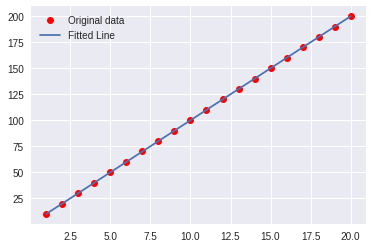

In [8]:
with tf.Session() as sess:
  sess.run(init)
  for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
      sess.run(optimizer, feed_dict={X:x, Y:y})
    
    if (epoch+1)%display_step == 0:
      training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
      print("Epoch:", (epoch+1), "Cost:", training_cost, "W:", sess.run(W), "b:", sess.run(b))
    
  print("Training Completed !")
  training_cost = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
  print("Cost:", training_cost, "W:", sess.run(W), "b:", sess.run(b))
  
  plt.plot(train_X, train_Y, "ro", label="Original data")
  plt.plot(train_X, train_X*sess.run(W)+sess.run(b), label="Fitted Line")
  plt.legend()
  plt.show()